In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, classification_report as cr
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [2]:
column_names = ["Blue","Green","Red","Skin"]
df = pd.read_csv("Skin_NonSkin.txt", names=column_names,sep="\t",engine='python')

In [3]:
df

,Blue,Green,Red,Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
...,...,...,...,...
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Blue    245057 non-null  int64
 1   Green   245057 non-null  int64
 2   Red     245057 non-null  int64
 3   Skin    245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


In [5]:
data = df.values

In [6]:
df.describe()

,Blue,Green,Red,Skin
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


In [7]:
df.isnull().sum()

Blue     0
Green    0
Red      0
Skin     0
dtype: int64

In [8]:
x,y = data[:,:-1],data[:,-1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=np.random.randint(10))
x1_train, x1_test, y1_train, y1_test = x_train, x_test, y_train, y_test

In [10]:
x_train.shape

(171539, 3)

In [11]:
y_train.shape

(171539,)

In [12]:
x_train

array([[101, 144, 211],
       [ 54,  55,  21],
       [126, 126, 126],
       ...,
       [121, 128,  91],
       [ 60, 122, 186],
       [ 70,  70,  22]], dtype=int64)

In [13]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuaracy=(accuracy_score(y_test, y_pred))*100
print(accuaracy)

92.49299491281047


In [14]:
cm_dtc = confusion_matrix(y_test,y_pred)

<ipython-input-15-5bee24a1e478>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,3,1)


<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}>

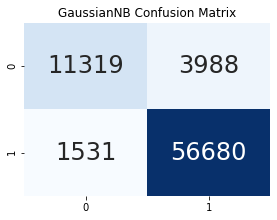

In [15]:
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.subplot(2,3,1)
plt.title("GaussianNB Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [16]:
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.74      0.80     15307
           2       0.93      0.97      0.95     58211

    accuracy                           0.92     73518
   macro avg       0.91      0.86      0.88     73518
weighted avg       0.92      0.92      0.92     73518



In [17]:
mp = MLPClassifier(random_state=1, max_iter=10)
# this step will take time
mp.fit(x1_train, y1_train)

c:\users\minha\.virtualenvs\pythonproject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=10, random_state=1)

In [18]:
y1_pred = mp.predict(x1_test)

In [19]:
accaurcy1=(accuracy_score(y1_test, y1_pred))*100
print(accaurcy1)

99.79324791207596


<ipython-input-20-debe1e076472>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,3,1)


<AxesSubplot:title={'center':' MLPClassifier Matrix'}>

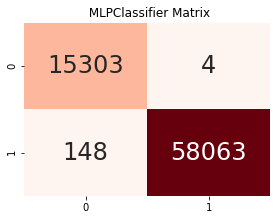

In [20]:
cm_mlp = confusion_matrix(y1_test,y1_pred)
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.subplot(2,3,1)
plt.title(" MLPClassifier Matrix")
sns.heatmap(cm_mlp,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

In [21]:
print(cr(y1_test, y1_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00     15307
           2       1.00      1.00      1.00     58211

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518

